In [1]:
import pandas as pd
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Mengunduh resource yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')

# Daftar stopwords custom atau bawaan NLTK
stop_words = set(stopwords.words('indonesian'))  # Ganti dengan bahasa Anda

# Fungsi casefolding

def casefolding(text):
    return ''.join([char.lower() if 'A' <= char <= 'Z' else char for char in text])

# Tokenize manual
def tokenize_manual(text):
    # Mengganti semua tanda baca dengan spasi
    text = re.sub(r'[\W_]+', ' ', text)  # Tanda baca atau karakter tidak alfanumerik jadi spasi
    # Split berdasarkan spasi
    tokens = text.split()
    return tokens

# Menghapus akhiran "nya" dan "an"
def remove_suffixes(tokens):
    return [re.sub(r'(nya|ter)$', '', word) for word in tokens]

# Preprocessing lengkap
def preprocess_text(text):
    text = casefolding(text)
    tokens = tokenize_manual(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = remove_suffixes(tokens)  # Menghapus akhiran
    return tokens

# Fungsi membaca kolom dari dataset pribadi
def baca_kolom_csv(dataframe, nama_kolom):
    try:
        # Mengecek apakah DataFrame kosong
        if dataframe.empty:
            print("Dataframe kosong.")
            return []
        if nama_kolom not in dataframe.columns:
            print(f"Kolom '{nama_kolom}' tidak ditemukan dalam DataFrame.")
            return []

        # Preprocessing kolom tertentu
        kolom = dataframe[nama_kolom].dropna()
        kata_kumpulan = [preprocess_text(str(kata)) for kata in kolom]

        # Mengembalikan hasil preprocessing dan sampel data asli
        return kata_kumpulan, kolom.head(10)  # Sampel 10 data pertama
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return []

# Contoh penggunaan
def main():
    # Memasukkan path file dataset pribadi
    file_path = "dataset_zalora.csv"  # Ganti dengan path ke file Anda
    nama_kolom = "content"  # Ganti dengan nama kolom yang ingin diproses

    try:
        # Membaca file CSV
        df = pd.read_csv(file_path)
        hasil_preprocessing, sampel = baca_kolom_csv(df, nama_kolom)

        # Menampilkan hasil
        if hasil_preprocessing:
            print("Sampel data asli:")
            print(sampel)
            print("\nHasil preprocessing:")
            for i, hasil in enumerate(hasil_preprocessing[:10], 1):  # Menampilkan hasil dengan nomor
                print(f"{i}. {hasil}")
    except FileNotFoundError:
        print(f"File '{file_path}' tidak ditemukan. Pastikan path sudah benar.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca file: {e}")

if __name__ == "__main__":
    main()

Sampel data asli:
0    pembayaran akhir nggk sesuai dgn harga diskon ...
1    Keren bosqu online belanja prduk eceran dan ke...
2                                        toko original
3                   produknya keren dan mudah ordernya
4                              Zalora...paling ok..👍👍👍
5                           Barangnya bagus dan mantap
6                                   Mantaaaap Djiwaaaa
7                                                    👍
8                                                 nice
9    Saya sangat suka dengan UI yang tertata rapi d...
Name: content, dtype: object

Hasil preprocessing:
1. ['pembayaran', 'nggk', 'sesuai', 'dgn', 'harga', 'diskon', 'yg', 'tertera', 'apk', 'eror', 'min']
2. ['keren', 'bosqu', 'online', 'belanja', 'prduk', 'eceran', 'ketengan', 'mantap', 'tingkatkan', 'bosqu', 'bermanfaat']
3. ['toko', 'original']
4. ['produk', 'keren', 'mudah', 'order']
5. ['zalora', 'ok']
6. ['barang', 'bagus', 'mantap']
7. ['mantaaaap', 'djiwaaaa']
8. []
9. ['n

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sampel data asli:
0    pembayaran akhir nggk sesuai dgn harga diskon ...
1    Keren bosqu online belanja prduk eceran dan ke...
2                                        toko original
3                   produknya keren dan mudah ordernya
4                              Zalora...paling ok..👍👍👍
5                           Barangnya bagus dan mantap
6                                   Mantaaaap Djiwaaaa
7                                                    👍
8                                                 nice
9    Saya sangat suka dengan UI yang tertata rapi d...
Name: content, dtype: object

Hasil preprocessing:
1. ['pembayar', 'nggk', 'sesuai', 'dgn', 'harga', 'diskon', 'yg', 'tertera', 'apk', 'eror', 'min']
2. ['keren', 'bosqu', 'online', 'belanja', 'prduk', 'ecer', 'keteng', 'mantap', 'tingkatk', 'bosqu', 'bermanfaat']
3. ['toko', 'original']
4. ['produk', 'keren', 'mudah', 'order']
5. ['zalora', 'ok']
6. ['barang', 'bagus', 'mantap']
7. ['mantaaaap', 'djiwaaaa']
8. []
9. ['nice']
10

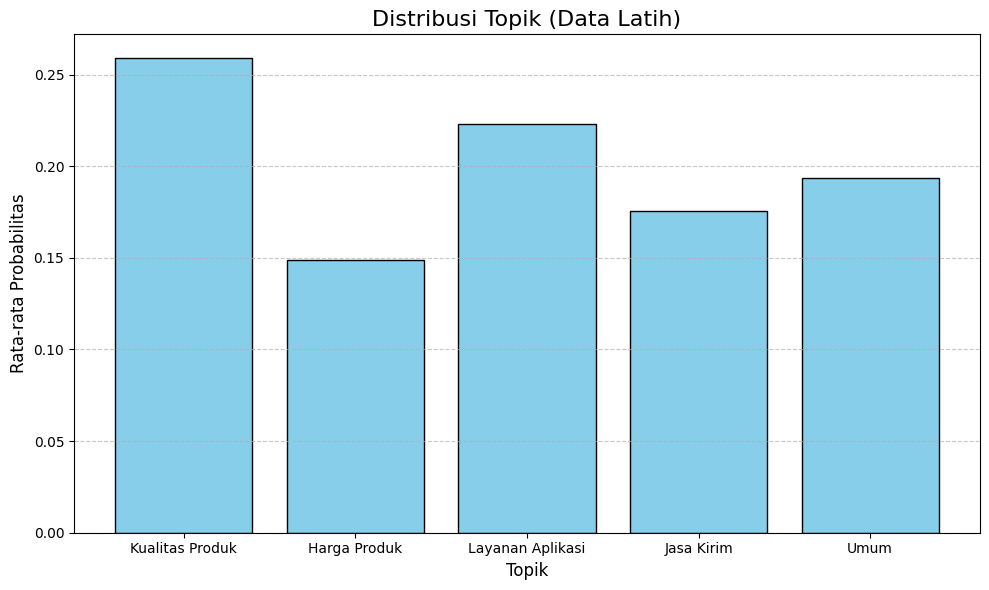

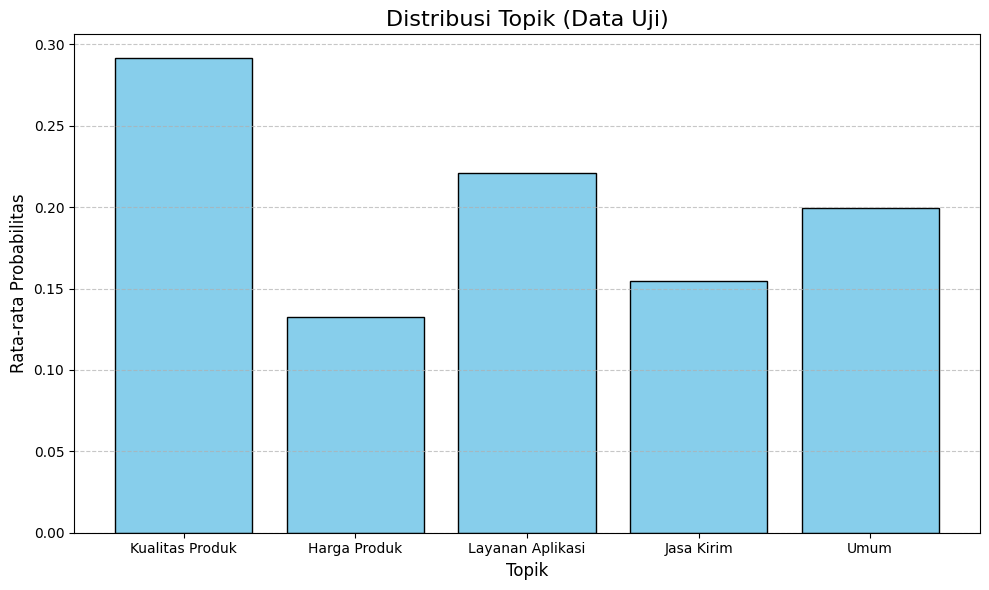

Nilai Koherensi c_v: 0.45502498400433344

Interpretasi Topik:
Topik 1: Topik terkait Kualitas Produk
Kata-kata utama: bagus, barang, mantap, zalora, original, produk, sesuai, belanja, , pengirim
Topik 2: Bukan Topik
Kata-kata utama: zalora, cs, pakai, baju, am, the, branded, tp, best, solusi
Topik 3: Topik terkait Kualitas Produk
Kata-kata utama: zalora, barang, , yg, good, beli, banget, belanja, ori, pengirim
Topik 4: Topik terkait Harga Produk
Kata-kata utama: ga, keren, diskon, mudah, puas, tanggal, update, pesan, 1, asli
Topik 5: Bukan Topik
Kata-kata utama: aplikasi, ok, yg, chat, , dikirim, barang, 2, proses, parah


In [2]:
import pandas as pd
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import untuk membagi data

# Mengunduh resource yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')

# Daftar stopwords custom atau bawaan NLTK
stop_words = set(stopwords.words('indonesian'))  # Ganti dengan bahasa Anda

# Fungsi casefolding
def casefolding(text):
    return ''.join([char.lower() if 'A' <= char <= 'Z' else char for char in text])

# Tokenize manual
def tokenize_manual(text):
    # Mengganti semua tanda baca dengan spasi
    text = re.sub(r'[\W_]+', ' ', text)  # Tanda baca atau karakter tidak alfanumerik jadi spasi
    # Split berdasarkan spasi
    tokens = text.split()
    return tokens

# Menghapus akhiran "nya" dan "an"
def remove_suffixes(tokens):
    return [re.sub(r'(nya|an)$', '', word) for word in tokens]

# Preprocessing lengkap
def preprocess_text(text):
    text = casefolding(text)
    tokens = tokenize_manual(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = remove_suffixes(tokens)  # Menghapus akhiran
    return tokens

# Fungsi membaca kolom dari dataset pribadi
def baca_kolom_csv(dataframe, nama_kolom):
    try:
        # Mengecek apakah DataFrame kosong
        if dataframe.empty:
            print("Dataframe kosong.")
            return []
        if nama_kolom not in dataframe.columns:
            print(f"Kolom '{nama_kolom}' tidak ditemukan dalam DataFrame.")
            return []

        # Preprocessing kolom tertentu
        kolom = dataframe[nama_kolom].dropna()
        kata_kumpulan = [preprocess_text(str(kata)) for kata in kolom]

        # Mengembalikan hasil preprocessing dan sampel data asli
        return kata_kumpulan, kolom.head(10)  # Sampel 10 data pertama
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return []

# Fungsi membangun model LDA dengan variational inference (tanpa Gibbs sampling)
def build_lda_model_variational(preprocessed_data, num_topics=5, passes=10):
    # Membuat dictionary dan corpus untuk LDA
    dictionary = Dictionary(preprocessed_data)
    corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

    # Membuat model LDA dengan variational inference (menggunakan 'iterations' dan 'alpha' untuk kontrol)
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, update_every=1, chunksize=100, iterations=50, alpha='symmetric')

    # Menampilkan topik-topik
    topics = lda_model.print_topics(num_words=10)
    print("Topik yang dihasilkan: (variational inference)")
    for topic in topics:
        print(topic)

    return lda_model, dictionary, corpus

# Fungsi untuk menghitung koherensi c_v
def calculate_coherence(lda_model, corpus, dictionary, texts):
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, texts=texts, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f"Nilai Koherensi c_v: {coherence_score}")
    return coherence_score

# Fungsi untuk menampilkan distribusi topik
def visualize_topic_distribution(lda_model, corpus, dictionary, num_topics=5, dataset_type='Latih'):
    # Menghitung distribusi topik
    topic_distribution = [dict(lda_model.get_document_topics(doc, minimum_probability=0)) for doc in corpus]
    avg_topic_distribution = {i: 0 for i in range(num_topics)}

    for doc_topics in topic_distribution:
        for topic_id, prob in doc_topics.items():
            avg_topic_distribution[topic_id] += prob

    avg_topic_distribution = {k: v / len(corpus) for k, v in avg_topic_distribution.items()}

    # Menyusun nama-nama topik sesuai dengan interpretasi
    topic_names = [
        "Kualitas Produk",  # Topik 1
        "Harga Produk",     # Topik 2
        "Layanan Aplikasi", # Topik 3
        "Jasa Kirim",       # Topik 4
        "Umum"              # Topik 5
    ]

    # Membuat grafik
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(avg_topic_distribution.keys(), avg_topic_distribution.values(), color='skyblue', edgecolor='black')
    ax.set_xlabel("Topik", fontsize=12)
    ax.set_ylabel("Rata-rata Probabilitas", fontsize=12)
    ax.set_title(f"Distribusi Topik ({dataset_type})", fontsize=16)
    ax.set_xticks(range(num_topics))
    ax.set_xticklabels(topic_names, fontsize=10)  # Mengubah label sumbu X dengan nama topik
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Fungsi untuk menginterpretasikan topik-topik
def interpret_topics(lda_model, num_topics=5):
    print("\nInterpretasi Topik:")
    topics = lda_model.print_topics(num_words=10)
    topic_keywords = {}

    for idx, topic in enumerate(topics):
        words = [word.split('*')[1].strip().strip('"') for word in topic[1].split(' + ')]
        # Menafsirkan berdasarkan kata-kata yang dominan
        if any(word in words for word in ['bagus', 'jelek', 'ori', 'original']):
            topic_keywords[idx] = "Topik terkait Kualitas Produk"
        elif any(word in words for word in ['mahal', 'diskon', 'murah', 'terjangkau']):
            topic_keywords[idx] = "Topik terkait Harga Produk"
        elif any(word in words for word in ['eror', 'bug', 'lemot', 'feedback']):
            topic_keywords[idx] = "Topik terkait Layanan Aplikasi"
        elif any(word in words for word in ['cepat', 'kurir', 'lambat', 'pesanan']):
            topic_keywords[idx] = "Topik terkait Jasa Kirim"
        else:
            topic_keywords[idx] = "Bukan Topik"

        print(f"Topik {idx + 1}: {topic_keywords[idx]}")
        print("Kata-kata utama:", ', '.join(words))

# Contoh penggunaan
def main():
    # Memasukkan path file dataset pribadi
    file_path = "dataset_zalora.csv"  # Ganti dengan path ke file Anda
    nama_kolom = "content"  # Ganti dengan nama kolom yang ingin diproses

    try:
        # Membaca file CSV
        df = pd.read_csv(file_path)
        hasil_preprocessing, sampel = baca_kolom_csv(df, nama_kolom)

        # Menampilkan hasil preprocessing
        if hasil_preprocessing:
            print("Sampel data asli:")
            print(sampel)
            print("\nHasil preprocessing:")
            for i, hasil in enumerate(hasil_preprocessing[:10], 1):  # Menampilkan hasil dengan nomor
                print(f"{i}. {hasil}")

            # Membagi data menjadi data latih dan data uji
            train_data, test_data = train_test_split(hasil_preprocessing, test_size=0.2, random_state=42)  # 80% data latih, 20% data uji

            print(f"\nJumlah data latih: {len(train_data)}")
            print(f"Jumlah data uji: {len(test_data)}")

            # Membuat model LDA (tanpa Gibbs sampling, menggunakan variational inference)
            lda_model, dictionary, corpus_train = build_lda_model_variational(train_data, num_topics=5, passes=10)

            # Visualisasi distribusi topik untuk data latih
            visualize_topic_distribution(lda_model, corpus_train, dictionary, num_topics=5, dataset_type='Data Latih')

            # Visualisasi distribusi topik untuk data uji
            corpus_test = [dictionary.doc2bow(text) for text in test_data]
            visualize_topic_distribution(lda_model, corpus_test, dictionary, num_topics=5, dataset_type='Data Uji')

            # Menghitung dan menampilkan koherensi
            coherence_score = calculate_coherence(lda_model, corpus_train, dictionary, train_data)

            # Interpretasi topik-topik
            interpret_topics(lda_model, num_topics=5)

    except FileNotFoundError:
        print(f"File '{file_path}' tidak ditemukan. Pastikan path sudah benar.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca file: {e}")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sampel data asli:
0    pembayaran akhir nggk sesuai dgn harga diskon ...
1    Keren bosqu online belanja prduk eceran dan ke...
2                                        toko original
3                   produknya keren dan mudah ordernya
4                              Zalora...paling ok..👍👍👍
5                           Barangnya bagus dan mantap
6                                   Mantaaaap Djiwaaaa
7                                                    👍
8                                                 nice
9    Saya sangat suka dengan UI yang tertata rapi d...
Name: content, dtype: object

Hasil preprocessing:
1. ['pembayar', 'nggk', 'sesuai', 'dgn', 'harga', 'diskon', 'yg', 'tertera', 'apk', 'eror', 'min']
2. ['keren', 'bosqu', 'online', 'belanja', 'prduk', 'ecer', 'keteng', 'mantap', 'tingkatk', 'bosqu', 'bermanfaat']
3. ['toko', 'original']
4. ['produk', 'keren', 'mudah', 'order']
5. ['zalora', 'ok']
6. ['barang', 'bagus', 'mantap']
7. ['mantaaaap', 'djiwaaaa']
8. []
9. ['nice']
10

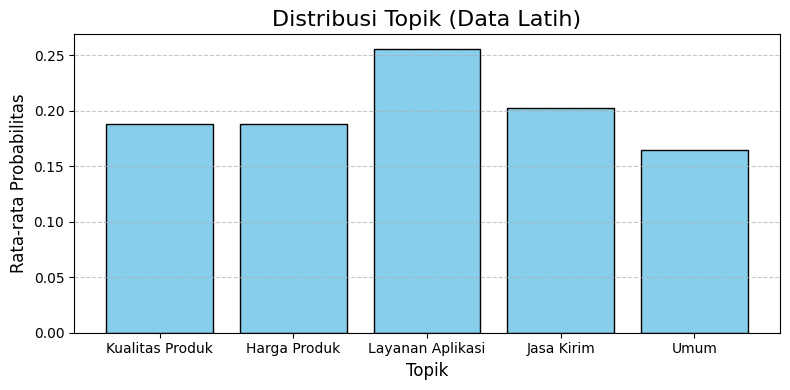

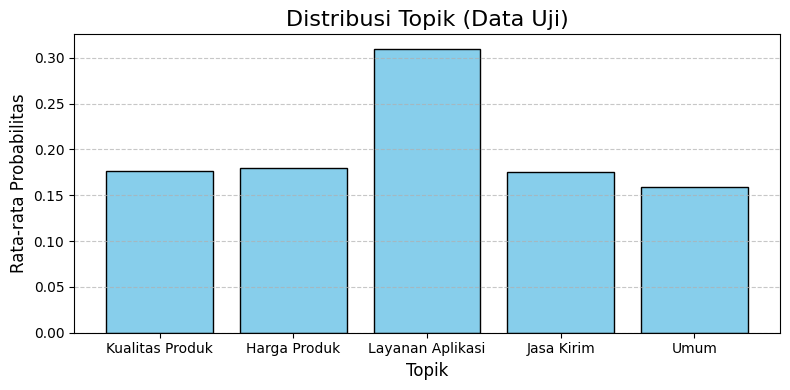

Nilai Koherensi c_v: 0.45579812063355896

Interpretasi Topik:
Topik 1: Topik terkait Kualitas Produk
Kata-kata utama: barang
Topik 2: Topik Umum
Kata-kata utama: Tidak ada kata kunci yang cocok
Topik 3: Topik terkait Kualitas Produk
Kata-kata utama: barang, bagus, original, ori
Topik 4: Topik Umum
Kata-kata utama: Tidak ada kata kunci yang cocok
Topik 5: Topik terkait Kualitas Produk
Kata-kata utama: barang


In [6]:
import pandas as pd
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Mengunduh resource yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')

# Daftar stopwords custom atau bawaan NLTK
stop_words = set(stopwords.words('indonesian'))

# Fungsi casefolding
def casefolding(text):
    return ''.join([char.lower() if 'A' <= char <= 'Z' else char for char in text])

# Tokenize manual
def tokenize_manual(text):
    text = re.sub(r'[\W_]+', ' ', text)  # Tanda baca atau karakter tidak alfanumerik jadi spasi
    tokens = text.split()
    return tokens

# Menghapus akhiran "nya" dan "an"
def remove_suffixes(tokens):
    return [re.sub(r'(nya|an)$', '', word) for word in tokens]

# Preprocessing lengkap
def preprocess_text(text):
    text = casefolding(text)
    tokens = tokenize_manual(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = remove_suffixes(tokens)
    return tokens

# Fungsi membaca kolom dari dataset pribadi
def baca_kolom_csv(dataframe, nama_kolom):
    try:
        if dataframe.empty:
            print("Dataframe kosong.")
            return []
        if nama_kolom not in dataframe.columns:
            print(f"Kolom '{nama_kolom}' tidak ditemukan dalam DataFrame.")
            return []

        kolom = dataframe[nama_kolom].dropna()
        kata_kumpulan = [preprocess_text(str(kata)) for kata in kolom]

        return kata_kumpulan, kolom.head(10)
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return []

# Fungsi untuk menghitung koherensi c_v
def calculate_coherence(lda_model, corpus, dictionary, texts):
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, texts=texts, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f"Nilai Koherensi c_v: {coherence_score}")
    return coherence_score

# Fungsi untuk menampilkan distribusi topik
def visualize_topic_distribution(lda_model, corpus, dictionary, num_topics=5, dataset_type='Latih'):
    topic_distribution = [dict(lda_model.get_document_topics(doc, minimum_probability=0)) for doc in corpus]
    avg_topic_distribution = {i: 0 for i in range(num_topics)}

    for doc_topics in topic_distribution:
        for topic_id, prob in doc_topics.items():
            avg_topic_distribution[topic_id] += prob

    avg_topic_distribution = {k: v / len(corpus) for k, v in avg_topic_distribution.items()}

    topic_names = [
        "Kualitas Produk",
        "Harga Produk",
        "Layanan Aplikasi",
        "Jasa Kirim",
        "Umum"
    ]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(avg_topic_distribution.keys(), avg_topic_distribution.values(), color='skyblue', edgecolor='black')
    ax.set_xlabel("Topik", fontsize=12)
    ax.set_ylabel("Rata-rata Probabilitas", fontsize=12)
    ax.set_title(f"Distribusi Topik ({dataset_type})", fontsize=16)
    ax.set_xticks(range(num_topics))
    ax.set_xticklabels(topic_names, fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Fungsi untuk menginterpretasikan topik-topik
def interpret_topics(lda_model, num_topics=5):
    print("\nInterpretasi Topik:")
    topics = lda_model.print_topics(num_words=10)
    topic_keywords = {}

    # Daftar kata kunci yang dapat dikonfigurasi
    keyword_mapping = {
        "Topik terkait Kualitas Produk": ['barang', 'bagus', 'jelek', 'ori', 'original'],
        "Topik terkait Harga Produk": ['mahal', 'diskon', 'murah', 'terjangkau'],
        "Topik terkait Layanan Aplikasi": ['eror', 'bug', 'lemot', 'feedback'],
        "Topik terkait Jasa Kirim": ['cepat', 'kurir', 'lambat', 'pesanan'],
        "Topik Umum": []  # Kata kunci untuk kategori default
    }

    # Gabungkan semua kata kunci
    all_keywords = set(word for keywords in keyword_mapping.values() for word in keywords)

    for idx, topic in enumerate(topics):
        # Ekstrak kata utama dari setiap topik
        words = [word.split('*')[1].strip().strip('"') for word in topic[1].split(' + ')]

        # Filter kata-kata utama agar hanya menyertakan kata kunci
        filtered_words = [word for word in words if word in all_keywords]

        assigned_topic = "Topik Umum"  # Default topik jika tidak cocok dengan kategori

        # Periksa kata kunci dari setiap kategori
        for category, keywords in keyword_mapping.items():
            if any(word in filtered_words for word in keywords):
                assigned_topic = category
                break  # Berhenti setelah menemukan kategori yang cocok

        topic_keywords[idx] = assigned_topic

        print(f"Topik {idx + 1}: {topic_keywords[idx]}")
        print("Kata-kata utama:", ', '.join(filtered_words) if filtered_words else "Tidak ada kata kunci yang cocok")

# Membuat model LDA dengan Gibbs Sampling
def build_lda_model_gibbs(preprocessed_data, num_topics=5, passes=10, iterations=100):
    dictionary = Dictionary(preprocessed_data)
    corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

    lda_model = LdaMulticore(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=passes,
        iterations=iterations,
        workers=8,
        random_state=42
    )

    topics = lda_model.print_topics(num_words=5)
    print("Topik yang dihasilkan: (Gibbs Sampling)")
    for topic in topics:
        print(topic)

    return lda_model, dictionary, corpus

# Fungsi utama
def main():
    file_path = "dataset_zalora.csv"
    nama_kolom = "content"

    try:
        df = pd.read_csv(file_path)
        hasil_preprocessing, sampel = baca_kolom_csv(df, nama_kolom)

        if hasil_preprocessing:
            print("Sampel data asli:")
            print(sampel)
            print("\nHasil preprocessing:")
            for i, hasil in enumerate(hasil_preprocessing[:10], 1):
                print(f"{i}. {hasil}")

            train_data, test_data = train_test_split(hasil_preprocessing, test_size=0.2, random_state=42)

            print(f"\nJumlah data latih: {len(train_data)}")
            print(f"Jumlah data uji: {len(test_data)}")

            lda_model, dictionary, corpus_train = build_lda_model_gibbs(train_data, num_topics=5, passes=10, iterations=100)

            visualize_topic_distribution(lda_model, corpus_train, dictionary, num_topics=5, dataset_type='Data Latih')

            corpus_test = [dictionary.doc2bow(text) for text in test_data]
            visualize_topic_distribution(lda_model, corpus_test, dictionary, num_topics=5, dataset_type='Data Uji')

            coherence_score = calculate_coherence(lda_model, corpus_train, dictionary, train_data)

            interpret_topics(lda_model, num_topics=5)

    except FileNotFoundError:
        print(f"File '{file_path}' tidak ditemukan. Pastikan path sudah benar.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca file: {e}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aminrahmat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sampel data asli:
0    pembayaran akhir nggk sesuai dgn harga diskon ...
1    Keren bosqu online belanja prduk eceran dan ke...
2                                        toko original
3                   produknya keren dan mudah ordernya
4                              Zalora...paling ok..👍👍👍
5                           Barangnya bagus dan mantap
6                                   Mantaaaap Djiwaaaa
7                                                    👍
8                                                 nice
9    Saya sangat suka dengan UI yang tertata rapi d...
Name: content, dtype: object

Hasil preprocessing:
1. ['pembayar', 'nggk', 'sesuai', 'dgn', 'harga', 'diskon', 'yg', 'tertera', 'apk', 'eror', 'min']
2. ['keren', 'bosqu', 'online', 'belanja', 'prduk', 'ecer', 'keteng', 'mantap', 'tingkatk', 'bosqu', 'bermanfaat']
3. ['toko', 'original']
4. ['produk', 'keren', 'mudah', 'order']
5. ['zalora', 'ok']
6. ['barang', 'bagus', 'mantap']
7. ['mantaaaap', 'djiwaaaa']
8. []
9. ['nice']
10

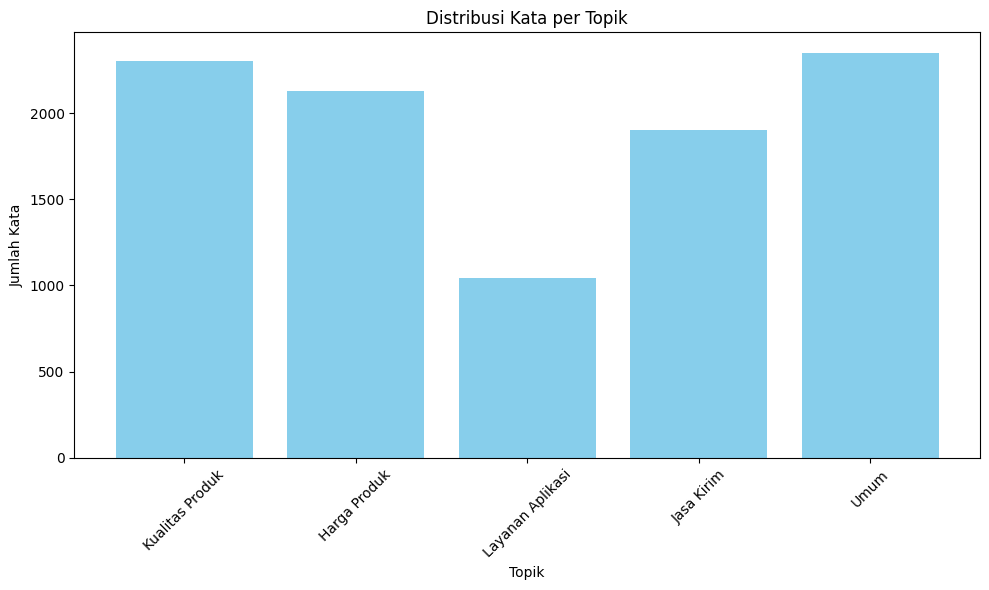


Evaluasi Coherence Score:

Coherence Score untuk Data Latih: 0.6092
Coherence Score untuk Data Uji: 0.6185


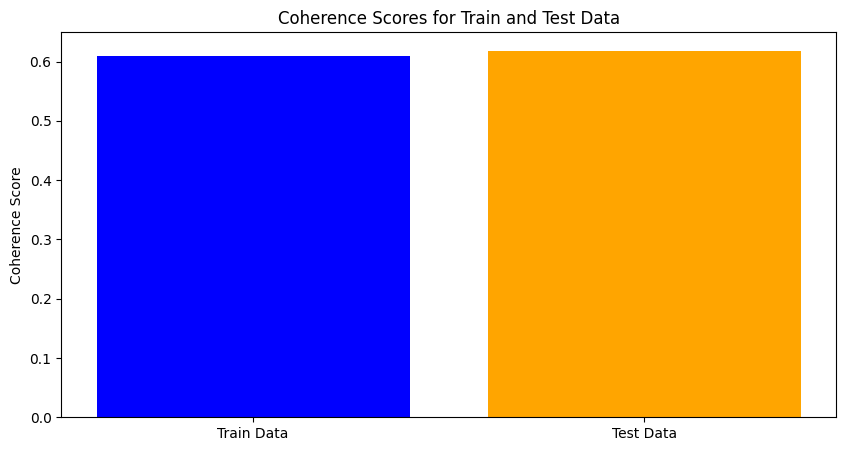

In [7]:
import pandas as pd
import nltk
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Mengunduh resource yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')

# Daftar stopwords custom atau bawaan NLTK
stop_words = set(stopwords.words('indonesian'))  # Ganti dengan bahasa Anda

# Fungsi casefolding
def casefolding(text):
    return ''.join([char.lower() if 'A' <= char <= 'Z' else char for char in text])

# Tokenize manual
def tokenize_manual(text):
    # Mengganti semua tanda baca dengan spasi
    text = re.sub(r'[\W_]+', ' ', text)  # Tanda baca atau karakter tidak alfanumerik jadi spasi
    # Split berdasarkan spasi
    tokens = text.split()
    return tokens

# Menghapus akhiran "nya" dan "an"
def remove_suffixes(tokens):
    return [re.sub(r'(nya|an)$', '', word) for word in tokens]

# Preprocessing lengkap
def preprocess_text(text):
    text = casefolding(text)
    tokens = tokenize_manual(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = remove_suffixes(tokens)  # Menghapus akhiran
    return tokens

# Fungsi membaca kolom dari dataset pribadi
def baca_kolom_csv(dataframe, nama_kolom):
    try:
        # Mengecek apakah DataFrame kosong
        if dataframe.empty:
            print("Dataframe kosong.")
            return []
        if nama_kolom not in dataframe.columns:
            print(f"Kolom '{nama_kolom}' tidak ditemukan dalam DataFrame.")
            return []

        # Preprocessing kolom tertentu
        kolom = dataframe[nama_kolom].dropna()
        kata_kumpulan = [preprocess_text(str(kata)) for kata in kolom]

        # Mengembalikan hasil preprocessing dan sampel data asli
        return kata_kumpulan, kolom.head(10)  # Sampel 10 data pertama
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return []

class LDAGibbs:
    def __init__(self, num_topics, alpha=0.1, beta=0.01):
        self.num_topics = num_topics
        self.alpha = alpha  # Dirichlet prior for topics
        self.beta = beta    # Dirichlet prior for words
        self.doc_topic_counts = None
        self.topic_word_counts = None
        self.topic_counts = None
        self.assignments = None
        self.vocab = None
        self.num_words = None
        self.num_docs = None

        # Menentukan nama topik dan kata kunci sesuai permintaan
        self.topic_names = [
            "Kualitas Produk",  # Topik 1
            "Harga Produk",     # Topik 2
            "Layanan Aplikasi", # Topik 3
            "Jasa Kirim",       # Topik 4
            "Umum"              # Topik 5
        ]

        self.topic_keywords = {
            "Kualitas Produk": ["bagus", "jelek", "ori", "original"],
            "Harga Produk": ["diskon", "mahal", "murah"],
            "Layanan Aplikasi": ["eror", "bug"],
            "Jasa Kirim": ["kurir", "ongkir", "lambat", "cepat"],
            "Umum": []
        }

    def fit(self, corpus):
        self.num_docs = len(corpus)
        self.vocab = set(word for doc in corpus for word in doc)
        self.num_words = len(self.vocab)
        self.doc_topic_counts = np.zeros((self.num_docs, self.num_topics))
        self.topic_word_counts = np.zeros((self.num_topics, self.num_words))
        self.topic_counts = np.zeros(self.num_topics)
        self.assignments = []

        word_to_id = {word: idx for idx, word in enumerate(self.vocab)}

        # Assign initial topics to each word in each document
        for doc_idx, doc in enumerate(corpus):
            doc_assignments = []
            for word in doc:
                word_id = word_to_id[word]
                topic = np.random.randint(self.num_topics)  # Randomly assign topic
                doc_assignments.append(topic)
                self.doc_topic_counts[doc_idx, topic] += 1
                self.topic_word_counts[topic, word_id] += 1
                self.topic_counts[topic] += 1
            self.assignments.append(doc_assignments)

        # Run Gibbs Sampling
        self.gibbs_sampling(corpus, word_to_id)

    def gibbs_sampling(self, corpus, word_to_id, num_iterations=1000):
        for iteration in range(num_iterations):
            for doc_idx, doc in enumerate(corpus):
                doc_assignments = self.assignments[doc_idx]
                for word_idx, word in enumerate(doc):
                    word_id = word_to_id[word]
                    current_topic = doc_assignments[word_idx]

                    # Decrease the counts for the current word's topic
                    self.doc_topic_counts[doc_idx, current_topic] -= 1
                    self.topic_word_counts[current_topic, word_id] -= 1
                    self.topic_counts[current_topic] -= 1

                    # Calculate topic probabilities (P(topic|doc) * P(word|topic))
                    topic_probabilities = self.calculate_topic_probabilities(doc_idx, word_id)

                    # Sample a new topic for the word
                    new_topic = np.random.choice(self.num_topics, p=topic_probabilities)
                    doc_assignments[word_idx] = new_topic

                    # Increase the counts for the new topic
                    self.doc_topic_counts[doc_idx, new_topic] += 1
                    self.topic_word_counts[new_topic, word_id] += 1
                    self.topic_counts[new_topic] += 1

            if (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1} completed")

    def calculate_topic_probabilities(self, doc_idx, word_id):
        topic_probabilities = np.zeros(self.num_topics)

        # Compute P(topic|doc) * P(word|topic)
        for topic in range(self.num_topics):
            topic_probabilities[topic] = (
                (self.doc_topic_counts[doc_idx, topic] + self.alpha) /
                (len(self.assignments[doc_idx]) + self.num_topics * self.alpha)
            ) * (
                (self.topic_word_counts[topic, word_id] + self.beta) /
                (self.topic_counts[topic] + self.num_words * self.beta)
            )

        topic_probabilities /= topic_probabilities.sum()  # Normalize
        return topic_probabilities

    def print_top_words(self, top_n=10):
        for topic in range(self.num_topics):
            print(f"Topik {self.topic_names[topic]}:")
            keyword_matches = []
            for keyword in self.topic_keywords[self.topic_names[topic]]:
                keyword_matches.append(keyword)

            if keyword_matches:
                print(f"Kata kunci terkait: {', '.join(keyword_matches)}")
            else:
                top_words_idx = self.topic_word_counts[topic].argsort()[-top_n:][::-1]
                for idx in top_words_idx:
                    print(f"  {list(self.vocab)[idx]}")
            print()

    def print_topic_probabilities(self, top_n_docs=5):
        print("\nProbabilitas Topik per Dokumen:")
        for doc_idx in range(min(self.num_docs, top_n_docs)):
            topic_counts = self.doc_topic_counts[doc_idx]
            total_words_in_doc = sum(topic_counts)
            topic_probabilities = (topic_counts + self.alpha) / (total_words_in_doc + self.num_topics * self.alpha)
            print(f"\nDokumen {doc_idx + 1}:")
            for topic_idx, prob in enumerate(topic_probabilities):
                print(f"  {self.topic_names[topic_idx]}: {prob:.4f}")
        if self.num_docs > top_n_docs:
            print(f"\n...Terdapat {self.num_docs - top_n_docs} dokumen lainnya yang tidak ditampilkan.")

    def plot_topic_distribution(self):
        # Distribusi kata di setiap topik
        plt.figure(figsize=(10, 6))
        plt.bar(self.topic_names, self.topic_counts, color='skyblue')
        plt.title('Distribusi Kata per Topik')
        plt.xlabel('Topik')
        plt.ylabel('Jumlah Kata')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def evaluate_coherence(self, corpus):
        # Membuat dictionary dan corpus untuk evaluasi
        dictionary = Dictionary(corpus)
        bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

        # Menghitung coherence score
        topic_word_distribution = [
            {word: count for word, count in zip(dictionary.keys(), self.topic_word_counts[topic])}
            for topic in range(self.num_topics)
        ]

        topics = [[word for word, count in sorted(dist.items(), key=lambda item: -item[1])[:10]]
                  for dist in topic_word_distribution]

        coherence_model = CoherenceModel(
            topics=topics, texts=corpus, dictionary=dictionary, coherence='c_v'
        )

        coherence_score = coherence_model.get_coherence()
        return coherence_score

    def plot_coherence_scores(self, train_corpus, test_corpus):
        train_score = self.evaluate_coherence(train_corpus)
        test_score = self.evaluate_coherence(test_corpus)

        # Menampilkan nilai coherence
        print(f"\nCoherence Score untuk Data Latih: {train_score:.4f}")
        print(f"Coherence Score untuk Data Uji: {test_score:.4f}")

        plt.figure(figsize=(10, 5))
        plt.bar(['Train Data', 'Test Data'], [train_score, test_score], color=['blue', 'orange'])
        plt.title('Coherence Scores for Train and Test Data')
        plt.ylabel('Coherence Score')
        plt.show()

# Fungsi utama
def main():
    # Memasukkan path file dataset pribadi
    file_path = "dataset_zalora.csv"  # Ganti dengan path ke file Anda
    nama_kolom = "content"  # Ganti dengan nama kolom yang ingin diproses

    try:
        # Membaca file CSV
        df = pd.read_csv(file_path)
        hasil_preprocessing, sampel = baca_kolom_csv(df, nama_kolom)

        if hasil_preprocessing:
            print("Sampel data asli:")
            print(sampel)
            print("\nHasil preprocessing:")
            for i, hasil in enumerate(hasil_preprocessing[:10], 1):
                print(f"{i}. {hasil}")

            # Membagi data menjadi data latih dan data uji
            train_data, test_data = train_test_split(
                hasil_preprocessing, test_size=0.2, random_state=42
            )

            print(f"\nJumlah data latih: {len(train_data)}, data uji: {len(test_data)}")

            # Membuat model LDA menggunakan Gibbs Sampling
            lda_model = LDAGibbs(num_topics=5)
            lda_model.fit(train_data)

            # Menampilkan topik yang ditemukan
            lda_model.print_top_words(top_n=10)

            # Menampilkan probabilitas topik untuk beberapa dokumen dari data uji
            print("\nEvaluasi pada data uji:")
            lda_model.print_topic_probabilities(top_n_docs=min(5, len(test_data)))

            # Menampilkan grafik distribusi kata per topik
            lda_model.plot_topic_distribution()

            # Menampilkan grafik coherence score
            print("\nEvaluasi Coherence Score:")
            lda_model.plot_coherence_scores(train_data, test_data)

    except FileNotFoundError:
        print(f"File '{file_path}' tidak ditemukan. Pastikan path sudah benar.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca file: {e}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sampel data asli:
0    pembayaran akhir nggk sesuai dgn harga diskon ...
1    Keren bosqu online belanja prduk eceran dan ke...
2                                        toko original
3                   produknya keren dan mudah ordernya
4                              Zalora...paling ok..👍👍👍
5                           Barangnya bagus dan mantap
6                                   Mantaaaap Djiwaaaa
7                                                    👍
8                                                 nice
9    Saya sangat suka dengan UI yang tertata rapi d...
Name: content, dtype: object

Hasil preprocessing:
1. ['pembayar', 'nggk', 'sesuai', 'dgn', 'harga', 'diskon', 'yg', 'tertera', 'apk', 'eror', 'min']
2. ['keren', 'bosqu', 'online', 'belanja', 'prduk', 'ecer', 'keteng', 'mantap', 'tingkatk', 'bosqu', 'bermanfaat']
3. ['toko', 'original']
4. ['produk', 'keren', 'mudah', 'order']
5. ['zalora', 'ok']
6. ['barang', 'bagus', 'mantap']
7. ['mantaaaap', 'djiwaaaa']
8. []
9. ['nice']
10

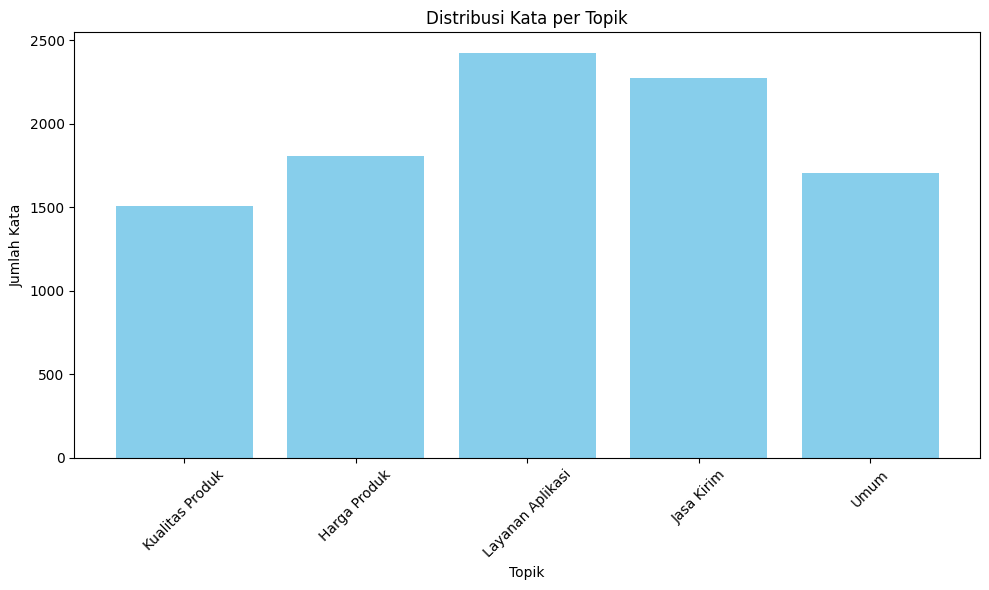


Evaluasi Coherence Score:

Coherence Score untuk Data Latih: 0.6053
Coherence Score untuk Data Uji: 0.6369


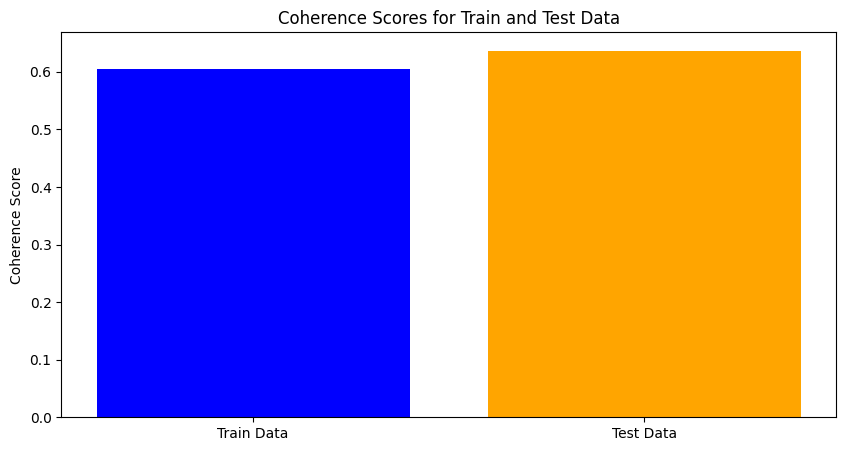

In [21]:
import pandas as pd
import nltk
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Mengunduh resource yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')

# Daftar stopwords custom atau bawaan NLTK
stop_words = set(stopwords.words('indonesian'))  # Ganti dengan bahasa Anda

# Fungsi casefolding
def casefolding(text):
    return ''.join([char.lower() if 'A' <= char <= 'Z' else char for char in text])

# Tokenize manual
def tokenize_manual(text):
    # Mengganti semua tanda baca dengan spasi
    text = re.sub(r'[\W_]+', ' ', text)  # Tanda baca atau karakter tidak alfanumerik jadi spasi
    # Split berdasarkan spasi
    tokens = text.split()
    return tokens

# Menghapus akhiran "nya" dan "an"
def remove_suffixes(tokens):
    return [re.sub(r'(nya|an)$', '', word) for word in tokens]

# Preprocessing lengkap
def preprocess_text(text):
    text = casefolding(text)
    tokens = tokenize_manual(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = remove_suffixes(tokens)  # Menghapus akhiran
    return tokens

# Fungsi membaca kolom dari dataset pribadi
def baca_kolom_csv(dataframe, nama_kolom):
    try:
        # Mengecek apakah DataFrame kosong
        if dataframe.empty:
            print("Dataframe kosong.")
            return []
        if nama_kolom not in dataframe.columns:
            print(f"Kolom '{nama_kolom}' tidak ditemukan dalam DataFrame.")
            return []

        # Preprocessing kolom tertentu
        kolom = dataframe[nama_kolom].dropna()
        kata_kumpulan = [preprocess_text(str(kata)) for kata in kolom]

        # Mengembalikan hasil preprocessing dan sampel data asli
        return kata_kumpulan, kolom.head(10)  # Sampel 10 data pertama
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
        return []

class LDAGibbs:
    def __init__(self, num_topics, alpha=0.01, beta=0.001):
        self.num_topics = num_topics
        self.alpha = alpha  # Dirichlet prior for topics
        self.beta = beta    # Dirichlet prior for words
        self.doc_topic_counts = None
        self.topic_word_counts = None
        self.topic_counts = None
        self.assignments = None
        self.vocab = None
        self.num_words = None
        self.num_docs = None

        # Menentukan nama topik dan kata kunci sesuai permintaan
        self.topic_names = [
            "Kualitas Produk",  # Topik 1
            "Harga Produk",     # Topik 2
            "Layanan Aplikasi", # Topik 3
            "Jasa Kirim",       # Topik 4
            "Umum"              # Topik 5
        ]

        self.topic_keywords = {
            "Kualitas Produk": ["bagus", "jelek", "ori", "original"],
            "Harga Produk": ["diskon", "mahal", "murah"],
            "Layanan Aplikasi": ["eror", "bug"],
            "Jasa Kirim": ["kurir", "ongkir", "lambat", "cepat"],
            "Umum": []
        }

    def fit(self, corpus):
        self.num_docs = len(corpus)
        self.vocab = set(word for doc in corpus for word in doc)
        self.num_words = len(self.vocab)
        self.doc_topic_counts = np.zeros((self.num_docs, self.num_topics))
        self.topic_word_counts = np.zeros((self.num_topics, self.num_words))
        self.topic_counts = np.zeros(self.num_topics)
        self.assignments = []

        word_to_id = {word: idx for idx, word in enumerate(self.vocab)}

        # Assign initial topics to each word in each document
        for doc_idx, doc in enumerate(corpus):
            doc_assignments = []
            for word in doc:
                word_id = word_to_id[word]
                topic = np.random.randint(self.num_topics)  # Randomly assign topic
                doc_assignments.append(topic)
                self.doc_topic_counts[doc_idx, topic] += 1
                self.topic_word_counts[topic, word_id] += 1
                self.topic_counts[topic] += 1
            self.assignments.append(doc_assignments)

        # Run Gibbs Sampling
        self.gibbs_sampling(corpus, word_to_id)

    def gibbs_sampling(self, corpus, word_to_id, num_iterations=10):
        for iteration in range(num_iterations):
            for doc_idx, doc in enumerate(corpus):
                doc_assignments = self.assignments[doc_idx]
                for word_idx, word in enumerate(doc):
                    word_id = word_to_id[word]
                    current_topic = doc_assignments[word_idx]

                    # Decrease the counts for the current word's topic
                    self.doc_topic_counts[doc_idx, current_topic] -= 1
                    self.topic_word_counts[current_topic, word_id] -= 1
                    self.topic_counts[current_topic] -= 1

                    # Calculate topic probabilities (P(topic|doc) * P(word|topic))
                    topic_probabilities = self.calculate_topic_probabilities(doc_idx, word_id)

                    # Sample a new topic for the word
                    new_topic = np.random.choice(self.num_topics, p=topic_probabilities)
                    doc_assignments[word_idx] = new_topic

                    # Increase the counts for the new topic
                    self.doc_topic_counts[doc_idx, new_topic] += 1
                    self.topic_word_counts[new_topic, word_id] += 1
                    self.topic_counts[new_topic] += 1

            if (iteration + 1) % 1 == 0:
                print(f"Iteration {iteration + 1} completed")

    def calculate_topic_probabilities(self, doc_idx, word_id):
        topic_probabilities = np.zeros(self.num_topics)

        # Compute P(topic|doc) * P(word|topic)
        for topic in range(self.num_topics):
            topic_probabilities[topic] = (
                (self.doc_topic_counts[doc_idx, topic] + self.alpha) /
                (len(self.assignments[doc_idx]) + self.num_topics * self.alpha)
            ) * (
                (self.topic_word_counts[topic, word_id] + self.beta) /
                (self.topic_counts[topic] + self.num_words * self.beta)
            )

        topic_probabilities /= topic_probabilities.sum()  # Normalize
        return topic_probabilities

    def print_top_words(self, top_n=10):
        for topic in range(self.num_topics):
            print(f"Topik {self.topic_names[topic]}:")
            keyword_matches = []
            for keyword in self.topic_keywords[self.topic_names[topic]]:
                keyword_matches.append(keyword)

            if keyword_matches:
                print(f"Kata kunci terkait: {', '.join(keyword_matches)}")
            else:
                top_words_idx = self.topic_word_counts[topic].argsort()[-top_n:][::-1]
                for idx in top_words_idx:
                    print(f"  {list(self.vocab)[idx]}")
            print()

    def print_topic_probabilities(self, top_n_docs=5):
        print("\nProbabilitas Topik per Dokumen:")
        for doc_idx in range(min(self.num_docs, top_n_docs)):
            topic_counts = self.doc_topic_counts[doc_idx]
            total_words_in_doc = sum(topic_counts)
            topic_probabilities = (topic_counts + self.alpha) / (total_words_in_doc + self.num_topics * self.alpha)

            print(f"\nDokumen {doc_idx + 1}:")
            for topic_idx, prob in enumerate(topic_probabilities):
                print(f"  {self.topic_names[topic_idx]}: {prob:.4f}")

        # Menentukan topik dengan probabilitas tertinggi
        max_prob_idx = np.argmax(topic_probabilities)
        max_prob = topic_probabilities[max_prob_idx]
        max_prob_topic = self.topic_names[max_prob_idx]

        # Menampilkan interpretasi untuk dokumen ini
        print(f"Interpretasi: Dokumen {doc_idx + 1} lebih berkaitan dengan topik '{max_prob_topic}' dengan probabilitas {max_prob:.4f}")


    def plot_topic_distribution(self):
        # Distribusi kata di setiap topik
        plt.figure(figsize=(10, 6))
        plt.bar(self.topic_names, self.topic_counts, color='skyblue')
        plt.title('Distribusi Kata per Topik')
        plt.xlabel('Topik')
        plt.ylabel('Jumlah Kata')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def evaluate_coherence(self, corpus):
        # Membuat dictionary dan corpus untuk evaluasi
        dictionary = Dictionary(corpus)
        bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

        # Menghitung coherence score
        topic_word_distribution = [
            {word: count for word, count in zip(dictionary.keys(), self.topic_word_counts[topic])}
            for topic in range(self.num_topics)
        ]

        topics = [[word for word, count in sorted(dist.items(), key=lambda item: -item[1])[:10]]
                  for dist in topic_word_distribution]

        coherence_model = CoherenceModel(
            topics=topics, texts=corpus, dictionary=dictionary, coherence='c_v'
        )

        coherence_score = coherence_model.get_coherence()
        return coherence_score

    def plot_coherence_scores(self, train_corpus, test_corpus):
        train_score = self.evaluate_coherence(train_corpus)
        test_score = self.evaluate_coherence(test_corpus)

        # Menampilkan nilai coherence
        print(f"\nCoherence Score untuk Data Latih: {train_score:.4f}")
        print(f"Coherence Score untuk Data Uji: {test_score:.4f}")

        plt.figure(figsize=(10, 5))
        plt.bar(['Train Data', 'Test Data'], [train_score, test_score], color=['blue', 'orange'])
        plt.title('Coherence Scores for Train and Test Data')
        plt.ylabel('Coherence Score')
        plt.show()

# Fungsi utama
def main():
    # Memasukkan path file dataset pribadi
    file_path = "dataset_zalora.csv"  # Ganti dengan path ke file Anda
    nama_kolom = "content"  # Ganti dengan nama kolom yang ingin diproses

    try:
        # Membaca file CSV
        df = pd.read_csv(file_path)
        hasil_preprocessing, sampel = baca_kolom_csv(df, nama_kolom)

        if hasil_preprocessing:
            print("Sampel data asli:")
            print(sampel)
            print("\nHasil preprocessing:")
            for i, hasil in enumerate(hasil_preprocessing[:10], 1):
                print(f"{i}. {hasil}")

            # Membagi data menjadi data latih dan data uji
            train_data, test_data = train_test_split(
                hasil_preprocessing, test_size=0.2, random_state=42
            )

            print(f"\nJumlah data latih: {len(train_data)}, data uji: {len(test_data)}")

            # Membuat model LDA menggunakan Gibbs Sampling
            lda_model = LDAGibbs(num_topics=5)
            lda_model.fit(train_data)

            # Menampilkan topik yang ditemukan
            lda_model.print_top_words(top_n=10)

            # Menampilkan probabilitas topik untuk beberapa dokumen dari data uji
            print("\nEvaluasi pada data uji:")
            lda_model.print_topic_probabilities(top_n_docs=min(5, len(test_data)))

            # Menampilkan grafik distribusi kata per topik
            lda_model.plot_topic_distribution()

            # Menampilkan grafik coherence score
            print("\nEvaluasi Coherence Score:")
            lda_model.plot_coherence_scores(train_data, test_data)

    except FileNotFoundError:
        print(f"File '{file_path}' tidak ditemukan. Pastikan path sudah benar.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca file: {e}")

if __name__ == "__main__":
    main()
